## Libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#### Read csv 

In [2]:
df10=pd.read_csv('cars24_data.csv')
df10

,Unnamed: 0,Company,Car_Name,Engine_Version,km_driven,Owner,mnf_year,Fuel_Type,Price,Emi
0,0,Maruti,Swift,VXI AMT Automatic,"34,460 km",1st,2018.0,Petrol,"₹6,16,399","₹12,051/month"
1,1,Mahindra,Thar,LX D 4*4 MT HT Manual,"10,292 km",1st,2021.0,Diesel,"₹16,73,799","₹32,723/month"
2,2,Maruti,Swift,LXI Manual,"13,780 km",1st,2019.0,Petrol,"₹5,58,699","₹10,923/month"
3,3,Maruti,Swift,LXI Manual,"22,900 km",1st,2020.0,Petrol,"₹5,58,499","₹10,919/month"
4,4,Maruti,Swift,LXI Manual,"17,435 km",1st,2020.0,Petrol,"₹5,92,499","₹11,583/month"
...,...,...,...,...,...,...,...,...,...,...
793,793,Maruti,Alto K10,VXI Manual,"7,427 km",1st,2019.0,Petrol,"₹4,16,999","₹8,152/month"
794,794,Hyundai,Elite i20,SPORTZ 1.2 Manual,"73,802 km",1st,2015.0,Petrol,"₹5,34,899","₹10,457/month"
795,795,Hyundai,GRAND I10 NIOS,1.2 Kappa Sports MT Manual,"14,972 km",1st,2019.0,Petrol,"₹5,96,099","₹11,654/month"
796,796,Hyundai,Eon,ERA PLUS Manual,"21,813 km",2nd,2016.0,Petrol,"₹2,82,399","₹5,521/month"


##  Data Handling

In [3]:
df10.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df10

,Company,Car_Name,Engine_Version,km_driven,Owner,mnf_year,Fuel_Type,Price,Emi
0,Maruti,Swift,VXI AMT Automatic,"34,460 km",1st,2018.0,Petrol,"₹6,16,399","₹12,051/month"
1,Mahindra,Thar,LX D 4*4 MT HT Manual,"10,292 km",1st,2021.0,Diesel,"₹16,73,799","₹32,723/month"
2,Maruti,Swift,LXI Manual,"13,780 km",1st,2019.0,Petrol,"₹5,58,699","₹10,923/month"
3,Maruti,Swift,LXI Manual,"22,900 km",1st,2020.0,Petrol,"₹5,58,499","₹10,919/month"
4,Maruti,Swift,LXI Manual,"17,435 km",1st,2020.0,Petrol,"₹5,92,499","₹11,583/month"
...,...,...,...,...,...,...,...,...,...
793,Maruti,Alto K10,VXI Manual,"7,427 km",1st,2019.0,Petrol,"₹4,16,999","₹8,152/month"
794,Hyundai,Elite i20,SPORTZ 1.2 Manual,"73,802 km",1st,2015.0,Petrol,"₹5,34,899","₹10,457/month"
795,Hyundai,GRAND I10 NIOS,1.2 Kappa Sports MT Manual,"14,972 km",1st,2019.0,Petrol,"₹5,96,099","₹11,654/month"
796,Hyundai,Eon,ERA PLUS Manual,"21,813 km",2nd,2016.0,Petrol,"₹2,82,399","₹5,521/month"


In [5]:
df10.shape

(798, 9)

In [6]:
df10.isnull().sum()

Company           1
Car_Name          1
Engine_Version    0
km_driven         0
Owner             1
mnf_year          1
Fuel_Type         1
Price             1
Emi               1
dtype: int64

In [7]:
df10[['kms_driven', 'km']] = df10['km_driven'].str.split(' ', 1, expand=True)

In [8]:
df10

,Company,Car_Name,Engine_Version,km_driven,Owner,mnf_year,Fuel_Type,Price,Emi,kms_driven,km
0,Maruti,Swift,VXI AMT Automatic,"34,460 km",1st,2018.0,Petrol,"₹6,16,399","₹12,051/month","34,460",km
1,Mahindra,Thar,LX D 4*4 MT HT Manual,"10,292 km",1st,2021.0,Diesel,"₹16,73,799","₹32,723/month","10,292",km
2,Maruti,Swift,LXI Manual,"13,780 km",1st,2019.0,Petrol,"₹5,58,699","₹10,923/month","13,780",km
3,Maruti,Swift,LXI Manual,"22,900 km",1st,2020.0,Petrol,"₹5,58,499","₹10,919/month","22,900",km
4,Maruti,Swift,LXI Manual,"17,435 km",1st,2020.0,Petrol,"₹5,92,499","₹11,583/month","17,435",km
...,...,...,...,...,...,...,...,...,...,...,...
793,Maruti,Alto K10,VXI Manual,"7,427 km",1st,2019.0,Petrol,"₹4,16,999","₹8,152/month","7,427",km
794,Hyundai,Elite i20,SPORTZ 1.2 Manual,"73,802 km",1st,2015.0,Petrol,"₹5,34,899","₹10,457/month","73,802",km
795,Hyundai,GRAND I10 NIOS,1.2 Kappa Sports MT Manual,"14,972 km",1st,2019.0,Petrol,"₹5,96,099","₹11,654/month","14,972",km
796,Hyundai,Eon,ERA PLUS Manual,"21,813 km",2nd,2016.0,Petrol,"₹2,82,399","₹5,521/month","21,813",km


In [9]:
df10.drop('km',axis=1,inplace=True)

In [10]:
df10

,Company,Car_Name,Engine_Version,km_driven,Owner,mnf_year,Fuel_Type,Price,Emi,kms_driven
0,Maruti,Swift,VXI AMT Automatic,"34,460 km",1st,2018.0,Petrol,"₹6,16,399","₹12,051/month","34,460"
1,Mahindra,Thar,LX D 4*4 MT HT Manual,"10,292 km",1st,2021.0,Diesel,"₹16,73,799","₹32,723/month","10,292"
2,Maruti,Swift,LXI Manual,"13,780 km",1st,2019.0,Petrol,"₹5,58,699","₹10,923/month","13,780"
3,Maruti,Swift,LXI Manual,"22,900 km",1st,2020.0,Petrol,"₹5,58,499","₹10,919/month","22,900"
4,Maruti,Swift,LXI Manual,"17,435 km",1st,2020.0,Petrol,"₹5,92,499","₹11,583/month","17,435"
...,...,...,...,...,...,...,...,...,...,...
793,Maruti,Alto K10,VXI Manual,"7,427 km",1st,2019.0,Petrol,"₹4,16,999","₹8,152/month","7,427"
794,Hyundai,Elite i20,SPORTZ 1.2 Manual,"73,802 km",1st,2015.0,Petrol,"₹5,34,899","₹10,457/month","73,802"
795,Hyundai,GRAND I10 NIOS,1.2 Kappa Sports MT Manual,"14,972 km",1st,2019.0,Petrol,"₹5,96,099","₹11,654/month","14,972"
796,Hyundai,Eon,ERA PLUS Manual,"21,813 km",2nd,2016.0,Petrol,"₹2,82,399","₹5,521/month","21,813"


In [11]:
df10["kms_driven"]=df10["kms_driven"].str.replace(",","",regex=True)

In [12]:
df10["Price"]=df10["Price"].str.replace("₹","",regex=True)

In [13]:
df10["Owner"]=df10["Owner"].str.replace("st","",regex=True)

In [14]:
df10["kms_driven"]=pd.to_numeric(df10["kms_driven"])

In [15]:
df10["Price"]=df10["Price"].str.replace(",","",regex=True)

In [16]:
df10["Price"]=pd.to_numeric(df10["Price"])

In [17]:
df10["Owner"]=df10["Owner"].str[:1]

In [18]:
df10.drop("km_driven",axis=1,inplace=True)

In [19]:
df10["Owner"]=pd.to_numeric(df10["Owner"])

In [20]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         797 non-null    object 
 1   Car_Name        797 non-null    object 
 2   Engine_Version  798 non-null    object 
 3   Owner           797 non-null    float64
 4   mnf_year        797 non-null    float64
 5   Fuel_Type       797 non-null    object 
 6   Price           797 non-null    float64
 7   Emi             797 non-null    object 
 8   kms_driven      797 non-null    float64
dtypes: float64(4), object(5)
memory usage: 56.2+ KB


In [21]:
df10.dropna(inplace=True)

In [22]:
df10.head()

,Company,Car_Name,Engine_Version,Owner,mnf_year,Fuel_Type,Price,Emi,kms_driven
0,Maruti,Swift,VXI AMT Automatic,1.0,2018.0,Petrol,616399.0,"₹12,051/month",34460.0
1,Mahindra,Thar,LX D 4*4 MT HT Manual,1.0,2021.0,Diesel,1673799.0,"₹32,723/month",10292.0
2,Maruti,Swift,LXI Manual,1.0,2019.0,Petrol,558699.0,"₹10,923/month",13780.0
3,Maruti,Swift,LXI Manual,1.0,2020.0,Petrol,558499.0,"₹10,919/month",22900.0
4,Maruti,Swift,LXI Manual,1.0,2020.0,Petrol,592499.0,"₹11,583/month",17435.0


In [23]:
#df10.to_csv('a.csv')

In [24]:
df10.dtypes[df10.dtypes=='object'].index

Index(['Company', 'Car_Name', 'Engine_Version', 'Fuel_Type', 'Emi'], dtype='object')

In [25]:
for i in df10.dtypes[df10.dtypes=='object'].index:
    print(df10[i].nunique())
#     print(df10[i].value_counts())
#     print('*'*50)
['Company', 'Car_Name', 'Fuel_Type']

18
83
181
3
436


['Company', 'Car_Name', 'Fuel_Type']

In [26]:
df10.dtypes

Company            object
Car_Name           object
Engine_Version     object
Owner             float64
mnf_year          float64
Fuel_Type          object
Price             float64
Emi                object
kms_driven        float64
dtype: object

### Label Encoding of some features 

In [27]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [28]:
used_cat_cols = ['Company', 'Car_Name', 'Fuel_Type']
for i in used_cat_cols:
    df10[i] = lb.fit_transform(df10[i])

In [29]:
df10.dtypes

Company             int32
Car_Name            int32
Engine_Version     object
Owner             float64
mnf_year          float64
Fuel_Type           int32
Price             float64
Emi                object
kms_driven        float64
dtype: object

In [30]:
cars = df10.copy()

In [31]:
cars.to_csv('cars.csv')

In [32]:
# df10['mnf_year'].value_counts()

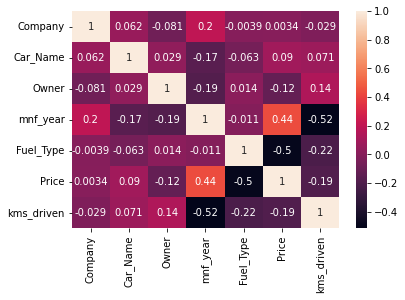

In [33]:
sns.heatmap(df10.corr(),annot=True)
plt.show()

## EDA(Exploratry Data Analysis)

C:\Users\Sanjeev boora\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


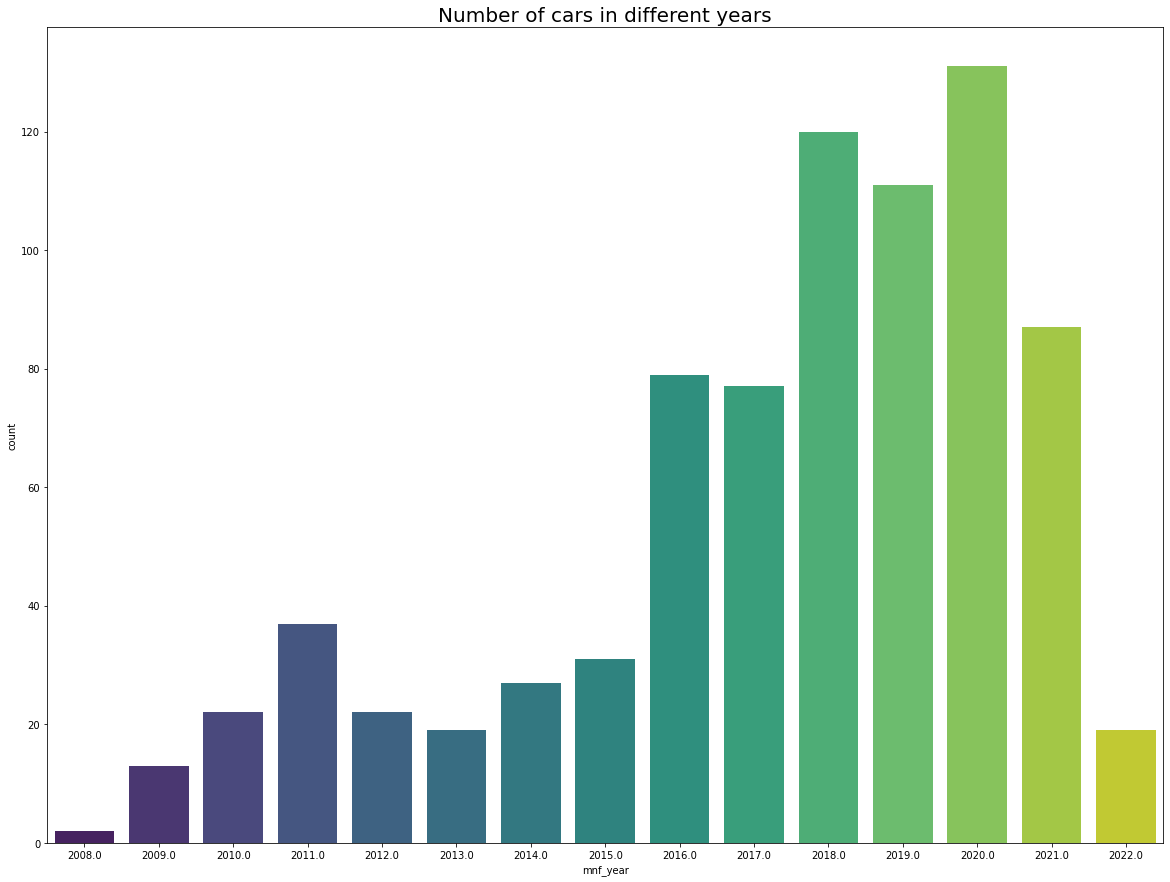

In [34]:
plt.figure(figsize = (20, 15))
sns.countplot(df10.mnf_year, palette = 'viridis')
plt.title("Number of cars in different years", fontsize = 20)
plt.show()

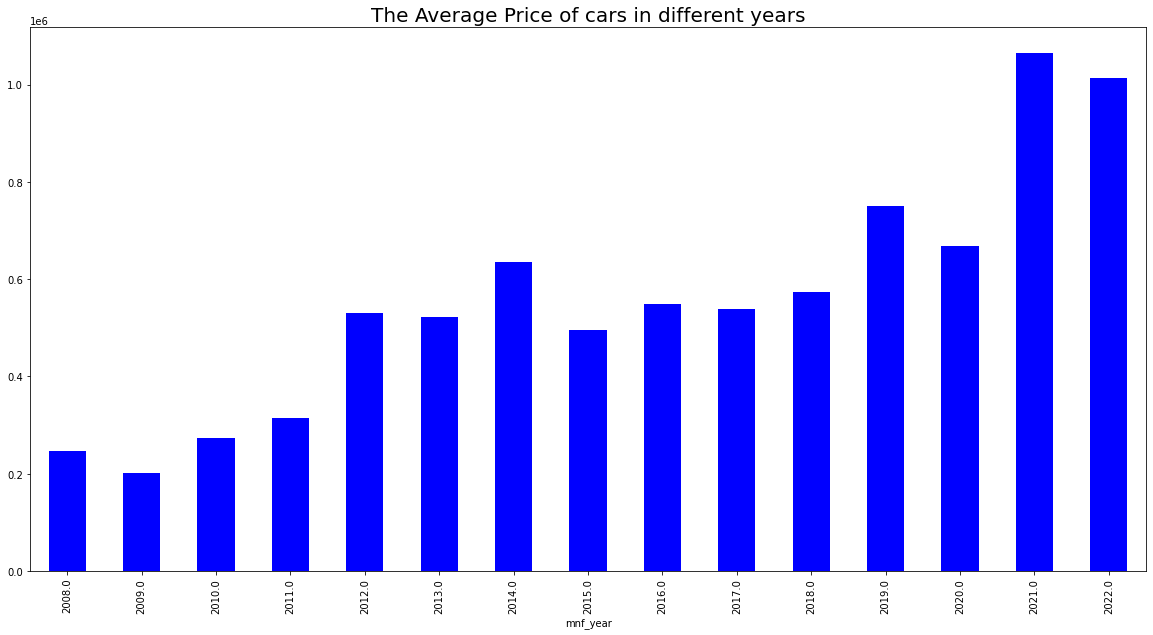

In [35]:
plt.figure(figsize = (20, 10))
df10.groupby('mnf_year')['Price'].mean().plot(kind = 'bar', color = 'b')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()

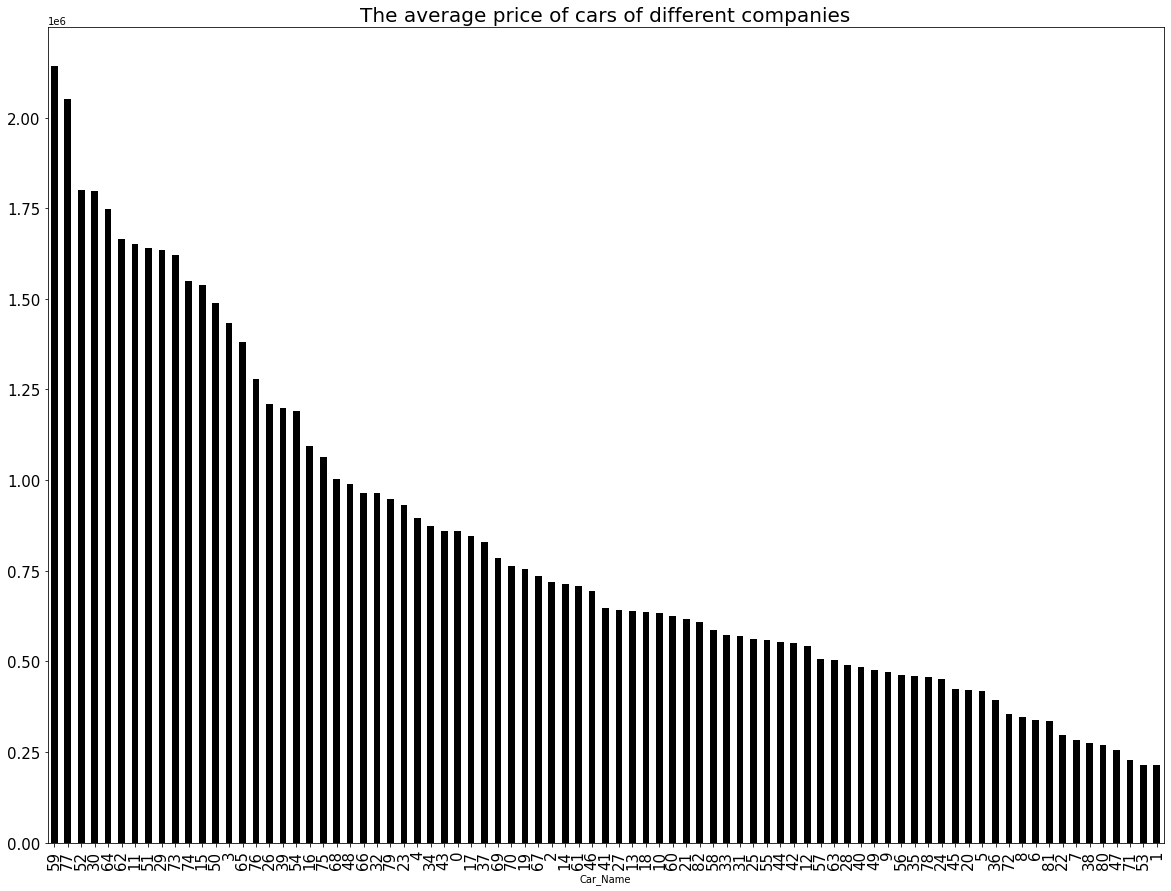

In [36]:
plt.figure(figsize = (20, 15))
df10.groupby(['Car_Name']).mean()['Price'].sort_values(ascending = False).plot(kind = 'bar', fontsize = 15, color = 'black')
plt.title("The average price of cars of different companies", fontsize = 20)
plt.show()

In [37]:
df10.columns

Index(['Company', 'Car_Name', 'Engine_Version', 'Owner', 'mnf_year',
       'Fuel_Type', 'Price', 'Emi', 'kms_driven'],
      dtype='object')

In [38]:
df10.dtypes

Company             int32
Car_Name            int32
Engine_Version     object
Owner             float64
mnf_year          float64
Fuel_Type           int32
Price             float64
Emi                object
kms_driven        float64
dtype: object

In [39]:
x = df10.iloc[:,[0,1,3,4,5,8]]
y = df10['Price']
x.head()

,Company,Car_Name,Owner,mnf_year,Fuel_Type,kms_driven
0,9,55,1.0,2018.0,2,34460.0
1,8,62,1.0,2021.0,0,10292.0
2,9,55,1.0,2019.0,2,13780.0
3,9,55,1.0,2020.0,2,22900.0
4,9,55,1.0,2020.0,2,17435.0


## Model Building
### Here we use following regression analysis algorithm 

### 1) Linear Regression
### 2) Decesion Tree Regressor
### 3) RandomForest Regressor
### 4) XGBRegressor

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=35)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(597, 6)
(200, 6)
(597,)
(200,)


In [42]:
def gen_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    print('Training Score',model.score(x_train,y_train))
    print('Testing Score',model.score(x_test,y_test))
    mae = mean_absolute_error(y_test,ypred)
    mse = mean_squared_error(y_test,ypred)
    rmse = np.sqrt(mse)
    r2_scr = r2_score(y_test,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2_scr)
    

In [43]:
# def reg_eval(ytest,ypred):
#     mae = mean_absolute_error(ytest,ypred)
#     mse = mean_squared_error(ytest,ypred)
#     rmse = mean_absolute_error(ytest,ypred)
#     r2_scr = r2_score(ytest,ypred)
#     print('MAE',mae)
#     print('MSE',mse)
#     print('RMSE',rmse)
#     print('r2_scr',r2_scr)
    
# def mscore(model):
#     print('Training Score',model.score(x_train,y_train))
#     print('Testing Score',model.score(x_test,y_test))

## Lin Reg

In [44]:
m1 = LinearRegression()
gen_model(m1,x_train,x_test,y_train,y_test)

Training Score 0.44872861864679003
Testing Score 0.5324646733220476
MAE 176817.48328413806
MSE 58351004508.12649
RMSE 241559.52580704924
R2 Score 0.5324646733220476


In [45]:
y_pred=m1.predict(x_test)

C:\Users\Sanjeev boora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


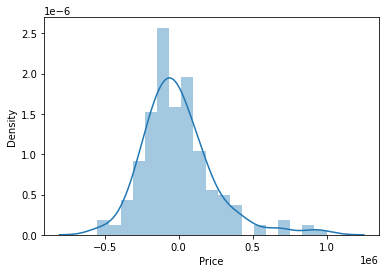

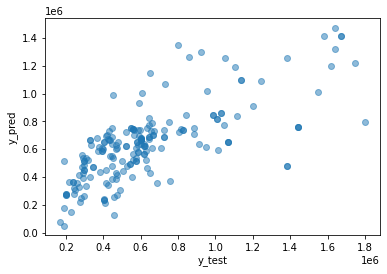

In [46]:
sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

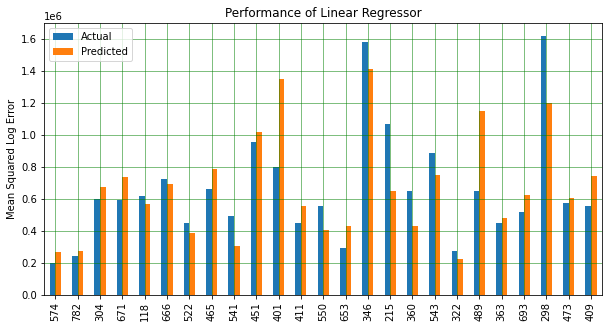

In [47]:
df10_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df10_check = df10_check.head(25)
#round(df_check,2)
df10_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Linear Regressor')
plt.ylabel('Mean Squared Log Error')
plt.show()

## DT Regressor

In [48]:
#max_features : int, float or {"auto", "sqrt", "log2"}splitter : {"best", "random"}min_samples_leaf : int or float, default=1

In [49]:
m2 = DecisionTreeRegressor(criterion="friedman_mse",max_depth=20,min_samples_split=10,min_samples_leaf=3,splitter="best")
gen_model(m2,x_train,x_test,y_train,y_test)

Training Score 0.9344647216783917
Testing Score 0.8524850406080348
MAE 76035.58359140858
MSE 18410685929.676876
RMSE 135685.9828046983
R2 Score 0.8524850406080348


In [50]:
y_pred=m2.predict(x_test)

C:\Users\Sanjeev boora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


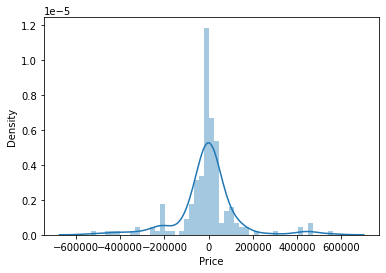

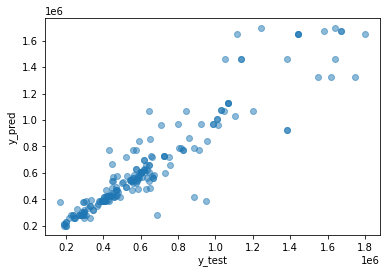

In [51]:
sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

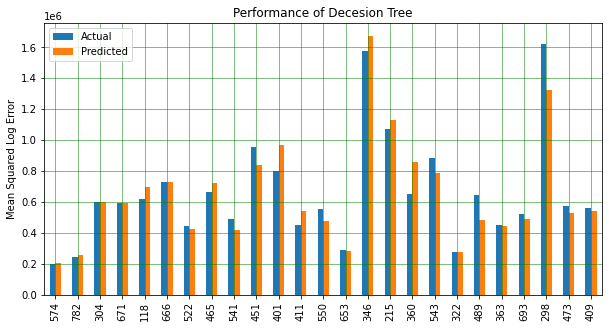

In [52]:
df10_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df10_check = df10_check.head(25)
#round(df_check,2)
df10_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Decesion Tree')
plt.ylabel('Mean Squared Log Error')
plt.show()

### Features Importance of DTReg

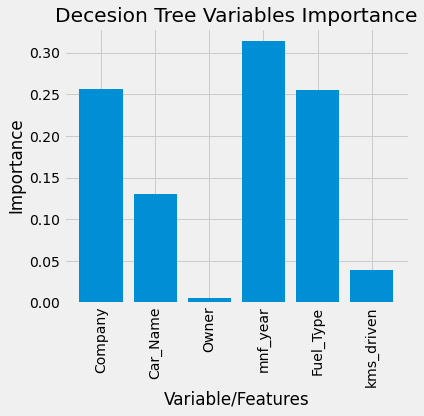

In [53]:
importances=m2.feature_importances_
features=x_train.columns
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Decesion Tree Variables Importance')
plt.tight_layout()
plt.show()

## Random Forest

In [54]:
m3 = RandomForestRegressor(criterion="mse",n_estimators=60,max_depth=12,)
gen_model(m3,x_train,x_test,y_train,y_test)

Training Score 0.9786054519234183
Testing Score 0.8829505385545663
MAE 65319.392802540104
MSE 14608422642.63998
RMSE 120865.30785399085
R2 Score 0.8829505385545663


C:\Users\Sanjeev boora\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [55]:
print(x_train.columns,"/n",m3.feature_importances_)

Index(['Company', 'Car_Name', 'Owner', 'mnf_year', 'Fuel_Type', 'kms_driven'], dtype='object') /n [0.2597339  0.12808091 0.00355639 0.28702983 0.2317643  0.08983467]


In [56]:
y_pred=m3.predict(x_test)

C:\Users\Sanjeev boora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


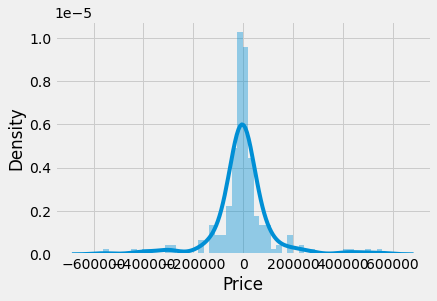

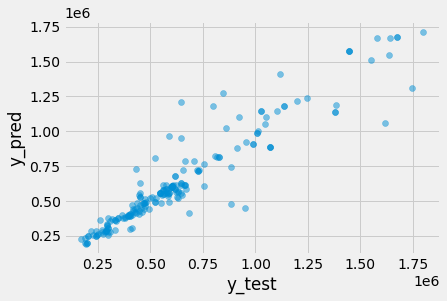

In [57]:
sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

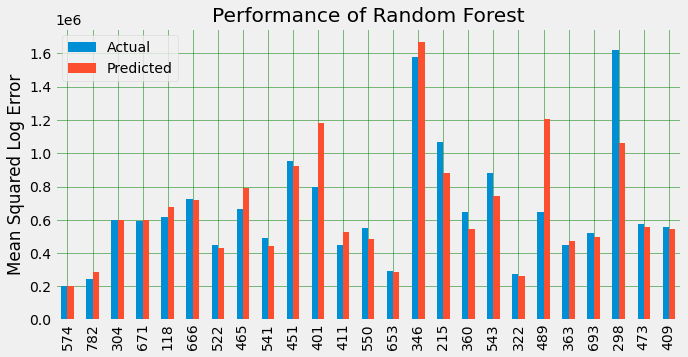

In [58]:
df10_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df10_check = df10_check.head(25)
#round(df_check,2)
df10_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.show()

### Features Importance of RFReg

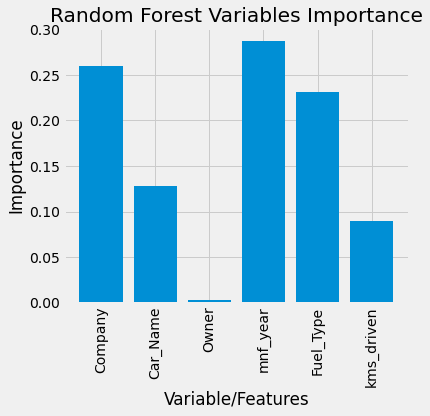

In [59]:
importances=m3.feature_importances_
features=x_train.columns
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.show()

## XGBRegressor

In [60]:
m4 = XGBRegressor(base_score=0.5, booster='gbtree',n_estimators=100, learning_rate=0.1,gamma=0.5,
                 reg_lambda=0.4,objective='reg:linear')
gen_model(m4,x_train,x_test,y_train,y_test)

[21:44:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Training Score 0.9960245507148214
Testing Score 0.9275437533848084
MAE 48158.66
MSE 9042941851.958124
RMSE 95094.38391386803
R2 Score 0.9275437533848084


In [61]:
y_pred=m4.predict(x_test)

C:\Users\Sanjeev boora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


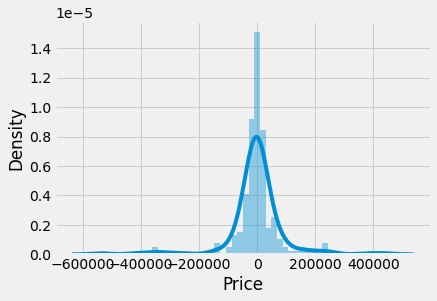

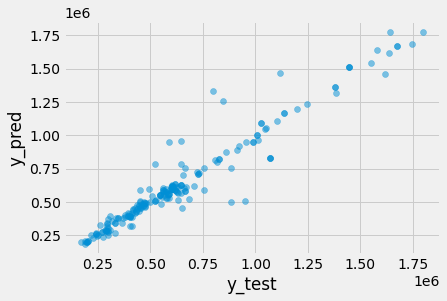

In [62]:
sns.distplot(y_test-y_pred)
plt.show()

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

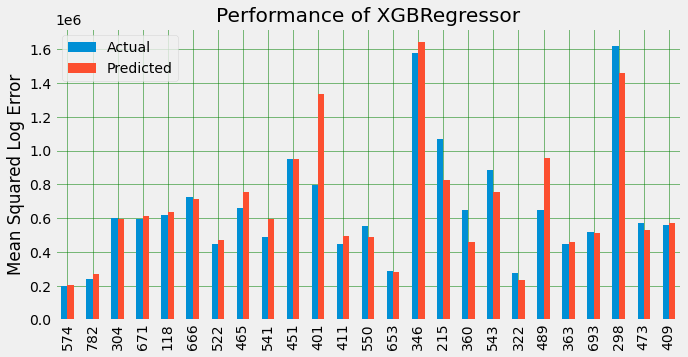

In [63]:
df10_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df10_check = df10_check.head(25)
#round(df_check,2)
df10_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of XGBRegressor')
plt.ylabel('Mean Squared Log Error')
plt.show()

### Features Importance of XGBReg

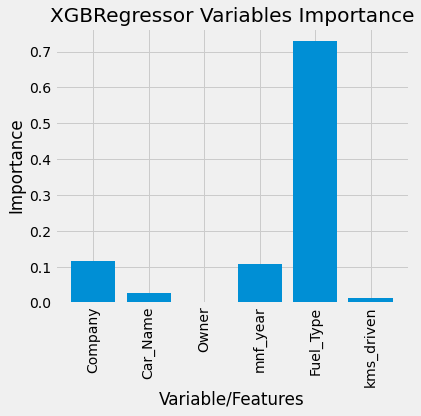

In [64]:
importances=m4.feature_importances_
features=x_train.columns
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('XGBRegressor Variables Importance')
plt.tight_layout()
plt.show()

#### Overall Performance

In [65]:
overall_performance={'Linear Reg':[ '176817.48328413806', '58351004508.12649',' 241559.52580704924',' 0.5324646733220476'],
               'DT Reg':['75913.08359140858','18399477179.676876', '135644.67250753668',' 0.8525748503146041'],
               'RF Reg':['59720.05280167958','12040375302.821577','109728.64394870456','0.9035269255776762'],
               'XGBReg':['48158.66','9042941851.958124','95094.38391386803','0.9275437533848084']}

df11=pd.DataFrame(overall_performance)

df11

,Linear Reg,DT Reg,RF Reg,XGBReg
0,176817.48328413806,75913.08359140858,59720.05280167958,48158.66
1,58351004508.12649,18399477179.676876,12040375302.821577,9042941851.958124
2,241559.52580704924,135644.67250753668,109728.64394870456,95094.38391386803
3,0.5324646733220476,0.8525748503146041,0.9035269255776762,0.9275437533848084


In [66]:
df11 = pd.DataFrame(overall_performance, index=['Mae',
                               'Mse',
                               'Rmse',
                               'R2 Score'])

In [67]:
df11

,Linear Reg,DT Reg,RF Reg,XGBReg
Mae,176817.48328413806,75913.08359140858,59720.05280167958,48158.66
Mse,58351004508.12649,18399477179.676876,12040375302.821577,9042941851.958124
Rmse,241559.52580704924,135644.67250753668,109728.64394870456,95094.38391386803
R2 Score,0.5324646733220476,0.8525748503146041,0.9035269255776762,0.9275437533848084


#### From above results we have find that XGBRegressor is the better R2Score or  accuracy so XGBReg is best fit model with better accuracy.

In [68]:
import pickle
  
# open a file, where you ant to store the data 

file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(m3, file)

In [69]:
!pip install powerbiclient
from powerbiclient import Report, models


In [70]:
from powerbiclient import Report,models
import cv2

In [71]:
# Authenticate the device to embed
from powerbiclient.authentication import DeviceCodeLoginAuthentication

In [72]:
# Initiate device authentication
device_auth = DeviceCodeLoginAuthentication()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code SSFM79ACD to authenticate.

Device flow authentication successfully completed.
You are now logged in.


In [74]:
group_id ='89e5fa56-aa9b-4ff1-b382-744f77379afa'
report_id = '3e646b2b-d0a8-4655-a13d-3ef8efa92147'

In [75]:
report = Report(group_id=group_id, report_id=report_id, auth=device_auth)
report

Report()

In [ ]:
img = cv2.imread("Dashboard.JPEG")


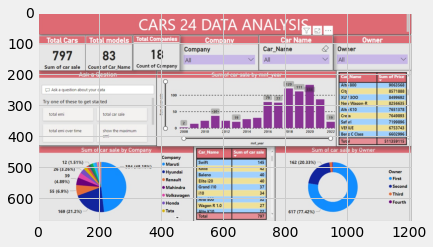

In [80]:
a = cv2.imread('Dashboard.JPEG')
a = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
plt.imshow(a)
plt.show()

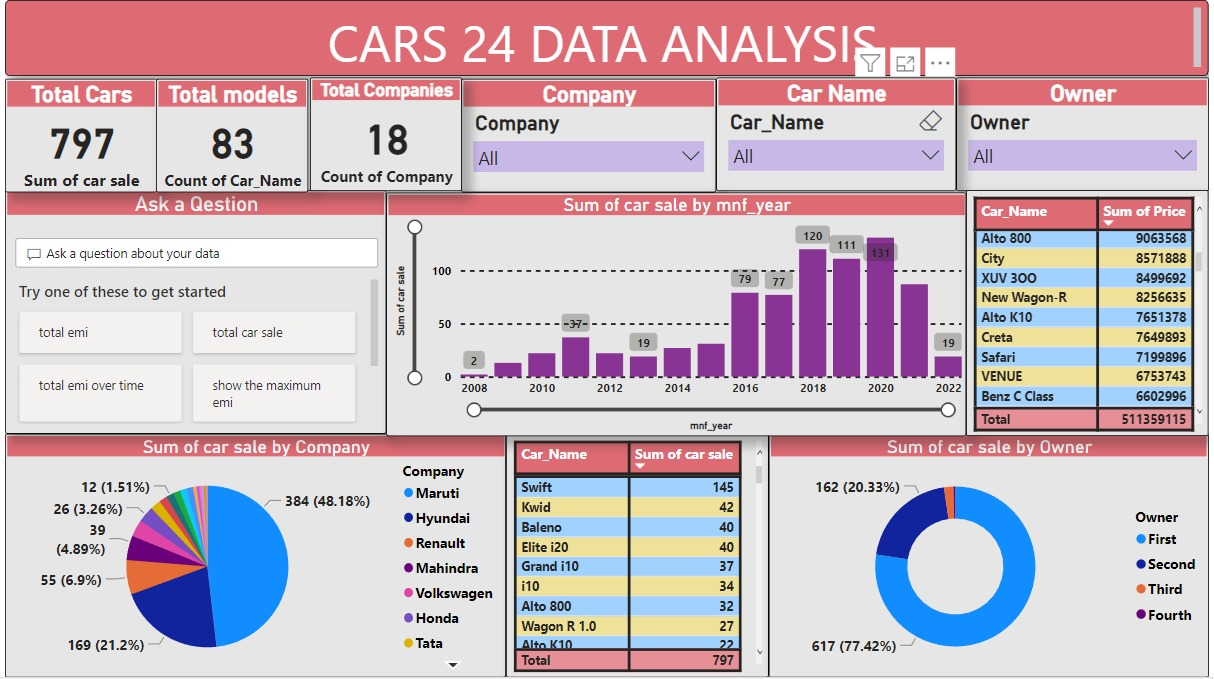